### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

### Importing Dataset

In [3]:
cardf = pd.read_csv(r"C:\Users\91852\Downloads\DataScience Innomatics Tasks\car_df_EDA.csv")

In [4]:
cardf.head()

,Unnamed: 0.1,Unnamed: 0,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130.0,mpfi,9.0,111,5000,21,27,13495
1,1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,dohc,four,130.0,mpfi,9.0,111,5000,21,27,16500
2,2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,ohcv,six,152.0,mpfi,9.0,154,5000,19,26,16500
3,3,4,audi,gas,std,four,sedan,fwd,front,99.8,...,ohc,four,109.0,mpfi,10.0,102,5500,24,30,13950
4,4,5,audi,gas,std,four,sedan,4wd,front,99.4,...,ohc,five,136.0,mpfi,8.0,115,5500,18,22,17450


In [5]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       208 non-null    int64  
 1   Unnamed: 0         208 non-null    int64  
 2   make               208 non-null    object 
 3   fuel_type          208 non-null    object 
 4   aspiration         208 non-null    object 
 5   num_of_doors       208 non-null    object 
 6   body_style         208 non-null    object 
 7   drive_wheels       208 non-null    object 
 8   engine_location    208 non-null    object 
 9   wheel_base         206 non-null    float64
 10  length             208 non-null    float64
 11  width              208 non-null    float64
 12  height             208 non-null    float64
 13  curb_weight        208 non-null    int64  
 14  engine_type        207 non-null    object 
 15  num_of_cylinders   208 non-null    object 
 16  engine_size        206 non

## Data Cleaning

### Structural Errors

In [6]:
cardf.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [7]:
cardf.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1, inplace=True)

In [8]:
for i in cardf.columns:
    print(i)
    print(cardf[i].dtype)
    print(cardf[i].unique())
    print("")

make
object
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

fuel_type
object
['gas' 'diesel']

aspiration
object
['std' 'turbo']

num_of_doors
object
['two' 'four' '?']

body_style
object
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drive_wheels
object
['rwd' 'fwd' '4wd']

engine_location
object
['front' 'rear']

wheel_base
float64
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2   nan 103.5 110.   88.4  93.7
 103.3  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9
 106.7 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3
  99.2 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7
 102.4 102.9 104.5  97.3 104.3 109.1]

length
float64
[168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.

In [9]:
def ndoor(x):
    if x == 'two':
        return 2
    elif x == 'four':
        return 4
    else:
        return np.nan

In [10]:
cardf['num_of_doors'] = cardf['num_of_doors'].apply(ndoor)
cardf['num_of_doors']

0      2.0
1      2.0
2      2.0
3      4.0
4      4.0
      ... 
203    4.0
204    4.0
205    4.0
206    4.0
207    4.0
Name: num_of_doors, Length: 208, dtype: float64

In [11]:
def ncyl (x):
    if x == 'two':
        return 2
    elif x == 'three':
        return 3
    elif x == 'four':
        return 4
    elif x == 'five':
        return 5
    elif x == 'six':
        return 6
    elif x == 'eight':
        return 8
    elif x == 'twelve':
        return 12
    else:
        return x

In [12]:
cardf['num_of_cylinders'] = cardf['num_of_cylinders'].apply(ncyl)

In [13]:
cardf['num_of_cylinders'].astype('int8')

0      4
1      4
2      6
3      4
4      5
      ..
203    6
204    4
205    6
206    6
207    4
Name: num_of_cylinders, Length: 208, dtype: int8

In [14]:
def hp(x):
    if str(x).isnumeric():
        return int(x)
    else:
        return np.nan

In [15]:
cardf['horsepower'] = cardf['horsepower'].apply(hp)

In [16]:
cardf['peak_rpm'] = cardf['peak_rpm'].apply(hp)

In [17]:
cardf['price'] = cardf['price'].apply(hp)

In [18]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               208 non-null    object 
 1   fuel_type          208 non-null    object 
 2   aspiration         208 non-null    object 
 3   num_of_doors       206 non-null    float64
 4   body_style         208 non-null    object 
 5   drive_wheels       208 non-null    object 
 6   engine_location    208 non-null    object 
 7   wheel_base         206 non-null    float64
 8   length             208 non-null    float64
 9   width              208 non-null    float64
 10  height             208 non-null    float64
 11  curb_weight        208 non-null    int64  
 12  engine_type        207 non-null    object 
 13  num_of_cylinders   208 non-null    int64  
 14  engine_size        206 non-null    float64
 15  fuel_system        208 non-null    object 
 16  compression_ratio  208 non

In [19]:
#all the columns are in desired type and the memory usage has also reduced

### Removing Duplicate rows

In [20]:
cardf.duplicated().sum()

3

In [21]:
cardf.drop_duplicates(keep = 'first', inplace=True)

In [22]:
cardf.duplicated().sum()

0

### Missing Values

In [23]:
cardf.isna().sum()  #missing values

make                 0
fuel_type            0
aspiration           0
num_of_doors         2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           2
length               0
width                0
height               0
curb_weight          0
engine_type          1
num_of_cylinders     0
engine_size          2
fuel_system          0
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                7
dtype: int64

In [24]:
cardf[cardf['num_of_doors'].isna()]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,...,ohc,4,98.0,mpfi,7.6,102.0,5500.0,24,30,8558.0
63,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,...,ohc,4,122.0,idi,22.7,64.0,4650.0,36,42,10795.0


In [25]:
cardf[cardf['make'] == 'dodge']

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
21,dodge,gas,std,2.0,hatchback,fwd,front,93.7,157.3,63.8,...,ohc,4,90.0,2bbl,9.41,68.0,5500.0,37,41,5572.0
22,dodge,gas,std,2.0,hatchback,fwd,front,NaN,157.3,63.8,...,ohc,4,90.0,2bbl,9.40,68.0,5500.0,31,38,6377.0
23,dodge,gas,turbo,2.0,hatchback,fwd,front,93.7,157.3,63.8,...,ohc,4,98.0,mpfi,7.60,102.0,5500.0,24,30,7957.0
24,dodge,gas,std,4.0,hatchback,fwd,front,93.7,157.3,63.8,...,ohc,4,90.0,2bbl,9.40,68.0,5500.0,31,38,6229.0
25,dodge,gas,std,4.0,sedan,fwd,front,93.7,157.3,63.8,...,ohc,4,90.0,2bbl,9.40,68.0,5500.0,31,38,6692.0
26,dodge,gas,std,4.0,sedan,fwd,front,93.7,157.3,63.8,...,ohc,4,90.0,2bbl,9.40,68.0,5500.0,31,38,7609.0
27,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,...,ohc,4,98.0,mpfi,7.60,102.0,5500.0,24,30,8558.0
28,dodge,gas,std,4.0,wagon,fwd,front,103.3,174.6,64.6,...,ohc,4,122.0,2bbl,8.50,88.0,5000.0,24,30,8921.0
29,dodge,gas,turbo,2.0,hatchback,fwd,front,95.9,173.2,66.3,...,ohc,4,156.0,mfi,7.00,145.0,5000.0,19,24,12964.0


In [26]:
cardf[cardf['make'] == 'dodge']['num_of_doors'].mode()

0    2.0
1    4.0
Name: num_of_doors, dtype: float64

In [27]:
cardf[cardf['make'] == 'mazda']

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
50,mazda,gas,std,2.0,hatchback,fwd,front,93.1,159.1,64.2,...,ohc,4,91.0,2bbl,9.0,68.0,5000.0,30,31,5195.0
51,mazda,gas,std,2.0,hatchback,fwd,front,93.1,159.1,64.2,...,ohc,4,91.0,2bbl,9.0,68.0,5000.0,31,38,6095.0
52,mazda,gas,std,2.0,hatchback,fwd,front,93.1,159.1,64.2,...,ohc,4,91.0,2bbl,9.0,68.0,5000.0,31,38,6795.0
53,mazda,gas,std,4.0,sedan,fwd,front,93.1,166.8,64.2,...,ohc,4,NaN,2bbl,9.0,68.0,5000.0,31,38,6695.0
54,mazda,gas,std,4.0,sedan,fwd,front,93.1,166.8,64.2,...,ohc,4,91.0,2bbl,9.0,68.0,5000.0,31,38,7395.0
55,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,rotor,2,70.0,4bbl,9.4,101.0,6000.0,17,23,10945.0
56,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,rotor,2,70.0,4bbl,9.4,101.0,6000.0,17,23,11845.0
57,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,rotor,2,70.0,4bbl,9.4,101.0,6000.0,17,23,13645.0
58,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,...,rotor,2,80.0,mpfi,9.4,135.0,6000.0,16,23,15645.0
59,mazda,gas,std,2.0,hatchback,fwd,front,98.8,177.8,66.5,...,ohc,4,122.0,2bbl,8.6,84.0,4800.0,26,32,8845.0


In [28]:
cardf[cardf['make'] == 'mazda']['num_of_doors'].mode()

0    2.0
Name: num_of_doors, dtype: float64

In [29]:
cardf['num_of_doors'].fillna(2, inplace=True)

In [30]:
cardf['num_of_doors'].isna().sum()

0

In [31]:
cardf['wheel_base'].isna().sum()

2

In [32]:
cardf[cardf['wheel_base'].isna()]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
11,bmw,gas,std,4.0,sedan,rwd,front,NaN,176.8,64.8,...,ohc,4,108.0,mpfi,8.8,101.0,5800.0,23,29,16925.0
22,dodge,gas,std,2.0,hatchback,fwd,front,NaN,157.3,63.8,...,ohc,4,90.0,2bbl,9.4,68.0,5500.0,31,38,6377.0


In [33]:
cardf[cardf['make'] == 'bmw']['wheel_base'].mode()

0    101.2
1    103.5
Name: wheel_base, dtype: float64

In [34]:
cardf[cardf['make'] == 'dodge']['wheel_base'].mode()

0    93.7
Name: wheel_base, dtype: float64

In [35]:
avg = (cardf[cardf['make'] == 'bmw']['wheel_base'].mode()[0] + cardf[cardf['make'] == 'bmw']['wheel_base'].mode()[1] + cardf[cardf['make'] == 'dodge']['wheel_base'].mode())/3

In [36]:
avg

0    99.466667
Name: wheel_base, dtype: float64

In [37]:
cardf['wheel_base'].fillna(avg[0], inplace=True)

In [38]:
cardf['wheel_base'].isna().sum()

0

In [39]:
cardf['engine_type'].isna().sum()

1

In [40]:
cardf['engine_type'].fillna(cardf['engine_type'].mode()[0], inplace=True)

In [41]:
cardf['engine_type'].isna().sum()

0

In [42]:
cardf['engine_size'].isna().sum()

2

In [43]:
cardf['engine_size'].fillna(cardf['engine_size'].median(), inplace=True)

In [44]:
cardf['engine_size'].isna().sum()

0

In [45]:
cardf['horsepower'].isna().sum()

2

In [46]:
cardf[cardf['horsepower'].isna()]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,...,ohc,4,132.0,mpfi,8.7,NaN,NaN,23,31,9295.0
131,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,...,ohc,4,132.0,mpfi,8.7,NaN,NaN,23,31,9895.0


In [47]:
cardf[cardf['make'] == 'renault']

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,...,ohc,4,132.0,mpfi,8.7,NaN,NaN,23,31,9295.0
131,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,...,ohc,4,132.0,mpfi,8.7,NaN,NaN,23,31,9895.0


In [48]:
cardf['horsepower'].median()

95.0

In [49]:
cardf['horsepower'].fillna(cardf['horsepower'].median(), inplace=True)

In [50]:
cardf['horsepower'].isna().sum()

0

In [51]:
cardf['peak_rpm'].isna().sum()

2

In [52]:
cardf['peak_rpm'].fillna(cardf['peak_rpm'].median(), inplace=True)

In [53]:
cardf['peak_rpm'].isna().sum()

0

In [54]:
cardf['price'].isna().sum()

7

In [55]:
cardf[cardf['price'].isna()]

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,audi,gas,turbo,2.0,hatchback,4wd,front,99.5,178.2,67.9,...,ohc,5,131.0,mpfi,7.0,160.0,5500.0,16,22,NaN
44,isuzu,gas,std,2.0,sedan,fwd,front,94.5,155.9,63.6,...,ohc,4,90.0,2bbl,9.6,70.0,5400.0,38,43,NaN
45,isuzu,gas,std,4.0,sedan,fwd,front,94.5,155.9,63.6,...,ohc,4,90.0,2bbl,9.6,70.0,5400.0,38,43,NaN
47,jaguar,gas,std,4.0,sedan,rwd,front,113.0,199.6,69.6,...,dohc,6,258.0,mpfi,8.1,176.0,4750.0,15,19,NaN
112,peugot,diesel,turbo,4.0,sedan,rwd,front,107.9,186.7,68.4,...,l,4,152.0,idi,21.0,95.0,4150.0,28,33,NaN
129,porsche,gas,std,2.0,hatchback,rwd,front,98.4,175.7,72.3,...,dohcv,8,203.0,mpfi,10.0,288.0,5750.0,17,28,NaN
203,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,188.8,68.9,...,ohc,6,145.0,idi,23.0,106.0,4800.0,26,27,NaN


In [56]:
cond1 = (cardf['make'] == 'audi') & (cardf['num_of_doors'] == 2) & (cardf['fuel_system'] == 'mpfi')

In [57]:
cardf[cond1]['price']

5    15250.0
9        NaN
Name: price, dtype: float64

In [58]:
cardf.at[9, 'price']  = 15250.0

In [59]:
cardf[cond1]['price']

5    15250.0
9    15250.0
Name: price, dtype: float64

In [60]:
cardf[cardf['make'] == 'isuzu']

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
43,isuzu,gas,std,4.0,sedan,rwd,front,94.3,170.7,61.8,...,ohc,4,111.0,2bbl,8.5,78.0,4800.0,24,29,6785.0
44,isuzu,gas,std,2.0,sedan,fwd,front,94.5,155.9,63.6,...,ohc,4,90.0,2bbl,9.6,70.0,5400.0,38,43,NaN
45,isuzu,gas,std,4.0,sedan,fwd,front,94.5,155.9,63.6,...,ohc,4,90.0,2bbl,9.6,70.0,5400.0,38,43,NaN
46,isuzu,gas,std,2.0,hatchback,rwd,front,96.0,172.6,65.2,...,ohc,4,119.0,spfi,9.2,90.0,5000.0,24,29,11048.0


In [61]:
cond2 = (cardf['make'] == 'isuzu') & (cardf['body_style'] == 'sedan') & (cardf['fuel_system'] == '2bbl')

In [62]:
cardf[cond2]['price']

43    6785.0
44       NaN
45       NaN
Name: price, dtype: float64

In [63]:
cardf.loc[44:45, 'price'] = cardf[cond2]['price'][43]

In [64]:
cardf[cond2]['price']

43    6785.0
44    6785.0
45    6785.0
Name: price, dtype: float64

In [65]:
cardf[cardf['make'] == 'jaguar']

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
47,jaguar,gas,std,4.0,sedan,rwd,front,113.0,199.6,69.6,...,dohc,6,258.0,mpfi,8.1,176.0,4750.0,15,19,NaN
48,jaguar,gas,std,4.0,sedan,rwd,front,113.0,199.6,69.6,...,dohc,6,258.0,mpfi,8.1,176.0,4750.0,15,19,35550.0
49,jaguar,gas,std,2.0,sedan,rwd,front,102.0,191.7,70.6,...,ohcv,12,326.0,mpfi,11.5,262.0,5000.0,13,17,36000.0


In [66]:
jagavg = cardf[cardf['make'] == 'jaguar']['price'].mean()
jagavg

35775.0

In [72]:
cardf.at[47, 'price'] = jagavg

In [73]:
cardf[cardf['make'] == 'jaguar']['price']

47    35775.0
48    35550.0
49    36000.0
Name: price, dtype: float64

In [74]:
cardf[cardf['make'] == 'peugot']

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
107,peugot,gas,std,4.0,sedan,rwd,front,107.9,186.7,68.4,...,l,4,120.0,mpfi,8.4,97.0,5000.0,19,24,11900.0
108,peugot,diesel,turbo,4.0,sedan,rwd,front,107.9,186.7,68.4,...,l,4,152.0,idi,21.0,95.0,4150.0,28,33,13200.0
109,peugot,gas,std,4.0,wagon,rwd,front,114.2,198.9,68.4,...,l,4,120.0,mpfi,8.4,97.0,5000.0,19,24,12440.0
110,peugot,diesel,turbo,4.0,wagon,rwd,front,114.2,198.9,68.4,...,l,4,152.0,idi,21.0,95.0,4150.0,25,25,13860.0
111,peugot,gas,std,4.0,sedan,rwd,front,107.9,186.7,68.4,...,l,4,120.0,mpfi,8.4,95.0,5000.0,19,24,15580.0
112,peugot,diesel,turbo,4.0,sedan,rwd,front,107.9,186.7,68.4,...,l,4,152.0,idi,21.0,95.0,4150.0,28,33,NaN
113,peugot,gas,std,4.0,wagon,rwd,front,114.2,198.9,68.4,...,l,4,120.0,mpfi,8.4,95.0,5000.0,19,24,16695.0
114,peugot,diesel,turbo,4.0,wagon,rwd,front,114.2,198.9,68.4,...,l,4,152.0,idi,21.0,95.0,4150.0,25,25,17075.0
115,peugot,gas,std,4.0,sedan,rwd,front,107.9,186.7,68.4,...,l,4,120.0,mpfi,8.4,97.0,5000.0,19,24,16630.0
116,peugot,diesel,turbo,4.0,sedan,rwd,front,107.9,186.7,68.4,...,l,4,152.0,idi,21.0,95.0,4150.0,28,33,17950.0


In [75]:
cardf.loc[112, 'price'] = cardf.loc[116, 'price']

In [76]:
cardf[cardf['make'] == 'peugot']['price'].isna().sum()

0

In [77]:
cardf[cardf['make'] == 'porsche']

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
125,porsche,gas,std,2.0,hatchback,rwd,front,94.5,168.9,68.3,...,ohc,4,151.0,mpfi,9.5,143.0,5500.0,19,27,22018.0
126,porsche,gas,std,2.0,hardtop,rwd,rear,89.5,168.9,65.0,...,ohcf,6,194.0,mpfi,9.5,207.0,5900.0,17,25,32528.0
127,porsche,gas,std,2.0,hardtop,rwd,rear,89.5,168.9,65.0,...,ohcf,6,194.0,mpfi,9.5,207.0,5900.0,17,25,34028.0
128,porsche,gas,std,2.0,convertible,rwd,rear,89.5,168.9,65.0,...,ohcf,6,194.0,mpfi,9.5,207.0,5900.0,17,25,37028.0
129,porsche,gas,std,2.0,hatchback,rwd,front,98.4,175.7,72.3,...,dohcv,8,203.0,mpfi,10.0,288.0,5750.0,17,28,NaN


In [78]:
pormed = cardf[cardf['make'] == 'porsche']['price'].median()
pormed

33278.0

In [79]:
cardf.at[129, 'price'] = pormed

In [80]:
cardf[cardf['make'] == 'volvo']

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
194,volvo,gas,std,4.0,sedan,rwd,front,104.3,188.8,67.2,...,ohc,4,141.0,mpfi,9.5,114.0,5400.0,23,28,12940.0
195,volvo,gas,std,4.0,wagon,rwd,front,104.3,188.8,67.2,...,ohc,4,141.0,mpfi,9.5,114.0,5400.0,23,28,13415.0
196,volvo,gas,std,4.0,sedan,rwd,front,104.3,188.8,67.2,...,ohc,4,141.0,mpfi,9.5,114.0,5400.0,24,28,15985.0
197,volvo,gas,std,4.0,wagon,rwd,front,104.3,188.8,67.2,...,ohc,4,141.0,mpfi,9.5,114.0,5400.0,24,28,16515.0
198,volvo,gas,turbo,4.0,sedan,rwd,front,104.3,188.8,67.2,...,ohc,4,130.0,mpfi,7.5,162.0,5100.0,17,22,18420.0
199,volvo,gas,turbo,4.0,wagon,rwd,front,104.3,188.8,67.2,...,ohc,4,130.0,mpfi,7.5,162.0,5100.0,17,22,18950.0
200,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,...,ohc,4,141.0,mpfi,9.5,114.0,5400.0,23,28,16845.0
201,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,188.8,68.8,...,ohc,4,141.0,mpfi,8.7,160.0,5300.0,19,25,19045.0
202,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,...,ohcv,6,173.0,mpfi,8.8,134.0,5500.0,18,23,21485.0
203,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,188.8,68.9,...,ohc,6,145.0,idi,23.0,106.0,4800.0,26,27,NaN


In [81]:
volavg = cardf[(cardf['make'] == 'volvo') & (cardf['aspiration'] == 'turbo')]['price'].mean()
volavg

19760.0

In [82]:
cardf.at[203, 'price'] = volavg

In [83]:
cardf.isna().sum()

make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### Data Visualization

In [84]:
plt.style.use('ggplot')

In [85]:
plt.style.use('dark_background')

<Axes: title={'center': 'Density plot of prices'}, ylabel='Density'>

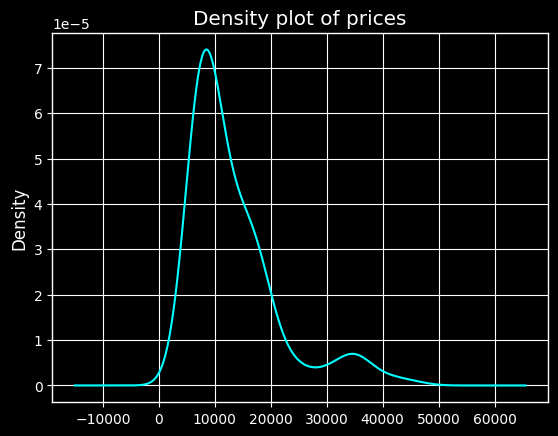

In [86]:
cardf['price'].plot(kind = 'kde', xlabel = 'Price of cars', title = 'Density plot of prices', color = 'cyan')

<Axes: title={'center': 'Histogram of Mileage on Highway'}, xlabel='Highway Mileage (miles per gallon)', ylabel='Frequency'>

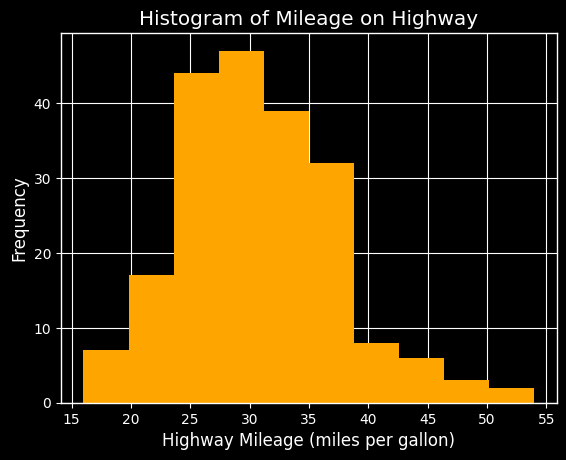

In [87]:
cardf['highway_mpg'].plot(kind = 'hist', xlabel = 'Highway Mileage (miles per gallon)', title = 'Histogram of Mileage on Highway', color = 'orange')